# **TOKENIZAR LISTA REVIEW**

Diana Pineda Valencia    
Cod. 20222579020

*Teoria y logica de programación*  
*06-05-2023* 

In [ ]:
#Se importen las librerias que se van a utilizar 
import pandas as pd
import nltk
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Se llama la base de datos que se va a utilizar 
data = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
data

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [ ]:
#Llamamos las frases usadas para guardar en un for la totalidad de los comentarios 
sentences =[]
for i in range(len(data.reviewText)):
  sentences = sentences + sent_tokenize(data.reviewText[i])

In [ ]:
for i in range(len(sentences)):
  print(sentences[i])

Se han truncado las últimas 5000 líneas del flujo de salida.
I'm addicted.
I had to play it like 5 times before came here and wrote the review.
It's funny the first time.
It's really cool to show to friends.
But after that, it's pointless.
Give it a try.
You know you want to.How can people possibly complain over something free like this?
Were they expecting something epic with a name like this?
all you do is press a bitten an seriously I'm its not even funny.
&gt;:( I hate it it is so stupid.
Cool app it is so fun and funny I prefer it for you good time wasterGood bye see ya
I wrote one like this way back in the DOS days.
I love it and very intelligent people I show it to can't put it down.
such a funny game!
o laugh every time!
P.S.
PRESS THE RED BUTTON!!!!!
haha hahaha hahahahaha ha haha haha haha
this button is solo funny!
he is so random, too.
but the funny kind of random.
but he gets mean.
but its funny when he gets mean because he says he will do things he is unable to do.
seriou

In [ ]:
print(len(sentences))  #Se obtienen las palabras principales del grupo de comentario
for k in range(len(sentences)):
  words = word_tokenize(sentences[k])
print(words)

58964
['Here', 'is', 'a', 'list', 'of', 'things', 'TO', 'MAKE', 'IT', 'BETTER', '&', 'bull', ';', 'First', ',', 'you', 'NEED', 'REAL', 'animals', '&', 'bull', ';', 'Second', ',', 'YOU', 'NEED', 'A', 'FARM', 'BARN', 'THING', '&', 'bull', ';', 'Next', ',', 'You', 'need', 'neigybors', 'and', 'better', 'food.', '&', 'bull', ';', 'Then', ',', 'You', 'need', 'to', 'pick', 'a', 'farmer', 'And', 'a', 'User', 'or', 'stormid', "'s", 'L']


In [ ]:
stop_words = stopwords.words('english') #Se filtran las palabras que no son utiles 
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
words = [w.lower() for w in words]
print(words)

['here', 'is', 'a', 'list', 'of', 'things', 'to', 'make', 'it', 'better', '&', 'bull', ';', 'first', ',', 'you', 'need', 'real', 'animals', '&', 'bull', ';', 'second', ',', 'you', 'need', 'a', 'farm', 'barn', 'thing', '&', 'bull', ';', 'next', ',', 'you', 'need', 'neigybors', 'and', 'better', 'food.', '&', 'bull', ';', 'then', ',', 'you', 'need', 'to', 'pick', 'a', 'farmer', 'and', 'a', 'user', 'or', 'stormid', "'s", 'l']


In [ ]:
#Se selecionan las principales palabras que se usaran 
words = [w for w in words if not w in stop_words and w.isalpha()] 
print(words)

['list', 'things', 'make', 'better', 'bull', 'first', 'need', 'real', 'animals', 'bull', 'second', 'need', 'farm', 'barn', 'thing', 'bull', 'next', 'need', 'neigybors', 'better', 'bull', 'need', 'pick', 'farmer', 'user', 'stormid', 'l']


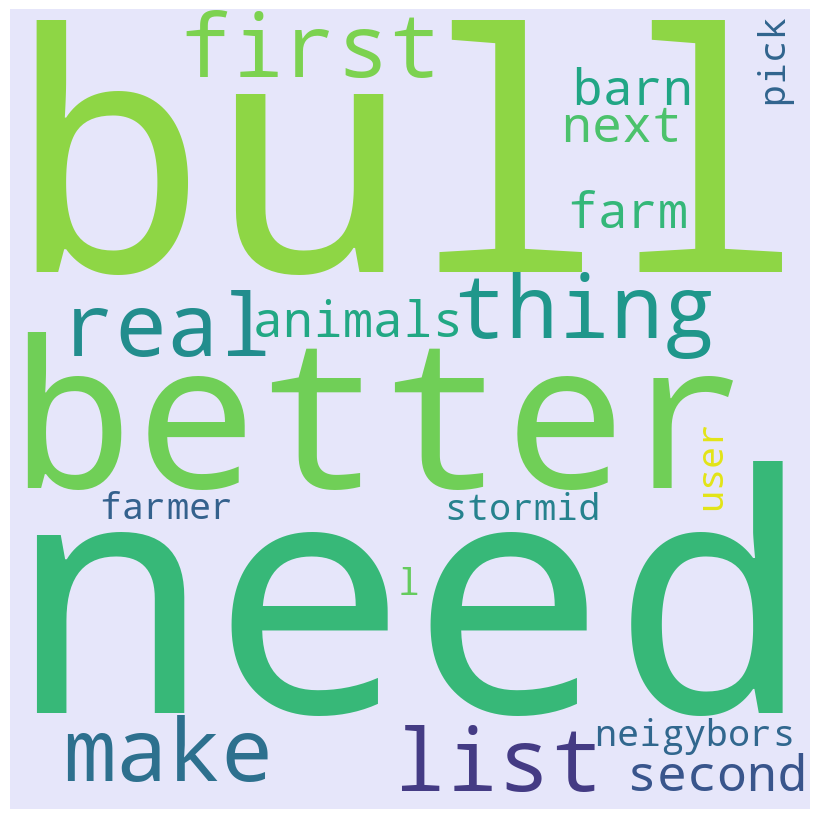

In [ ]:
#Se crea el mosaico de palabras 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

textoWC = ' '.join(words)
wordcloud = WordCloud(
    width = 800,
    height = 800,
    background_color = '#E6E6FA',
    stopwords = STOPWORDS,
    relative_scaling = 0,
    min_font_size = 10
).generate(textoWC)

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)